In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
dataset = load_wine()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
cv_score = np.mean(cross_val_score(clf, X, y))

recall, f1score, _, _ = report["macro avg"].values()

In [5]:
print(
    "--- Model evaluation ---",
    f"y predictions   : {y_pred[:10]}",
    f"y labels        : {y_test[:10]}",
    f"CV score        : {cv_score:.2f}",
    f"Average recall  : {recall:.2f}",
    f"Average F1 score: {f1score:.2f}",
    sep="\n"
)

--- Model evaluation ---
y predictions   : [2 0 0 0 2 1 0 1 1 0]
y labels        : [2 0 0 0 2 1 0 1 1 0]
CV score        : 0.97
Average recall  : 0.97
Average F1 score: 0.98


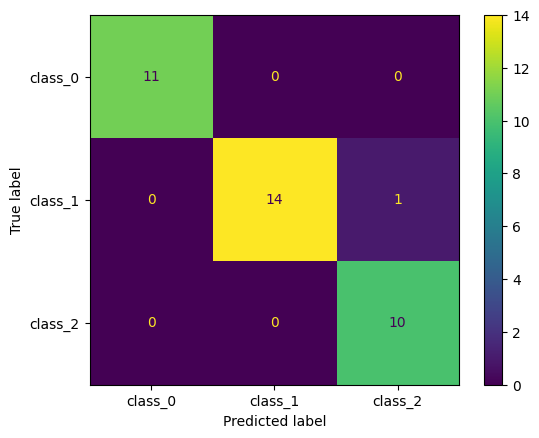

In [6]:
confmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confmat, display_labels=dataset.target_names).plot()